<h1 align="center">Análise Generalista de um Sistema Dinâmico LIT de 1° Ordem <h1/>

Podemos modelar um **Sistema Dinâmico LIT de 1° Ordem** através de uma **EDO**, como mostrado abaixo:

$$a_1\dfrac{dy(t)}{dt} + a_0y(t) = x(t)$$



Aplicando a Transformada de Laplace $\bf{\mathscr{L}}$, temos:

$$a_1Sy(s) + a_0y(s) = x(s)$$

Agora podemos encontrar a **Função de Transferência** $\bf{G(s)}$ desse sistema:

$$(a_1S + a_0)y(s) = x(s)$$

$$G(s) = \dfrac{y(s)}{x(s)} = \dfrac{1}{(a_1S + a_0)}$$

Podemos manipular $\bf{G(s)}$ e obter diferentes equações equivalentes, como mostrado abaixo:

$$G(s) = \dfrac{y(s)}{x(s)} = \dfrac{1}{(a_1S + a_0)} = \dfrac{1/a_1}{(S + a_0/a_1)} = \dfrac{1/a_0}{(a_1/a_0S + 1)} $$

Para generalizarmos a análise desse sistema, vamos está interesados na ultima forma de escrita essa equação, como segue abaixo:

$$G(s) = \dfrac{y(s)}{x(s)} = \dfrac{1/a_0}{(a_1/a_0S + 1)} $$

Forma Genérica:

$$G(s) = \dfrac{K}{(\tau S + 1)} $$

**Onde:**

> + $K$ : Ganho do Sistema
> + $\tau$ : Constante de Temnpo

<br>

<h2 align="center"> Analisando a Resposta ao Degrau $u(t)$ <h2/>

$$u(t) = \dfrac{1}{S}$$

$$Y(s) = \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S} = \dfrac{A}{S} + \dfrac{B}{\tau S + 1}$$

Encontrando o valor de $\bf{A}$:

$$A = \left. \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S} \cdot S \right |_{s=0} = K$$

Encontrando o valor de $\bf{B}$:

$$B = \left. \dfrac{K}{(\tau S + 1)} \cdot \dfrac{1}{S} \cdot (\tau S + 1) \right |_{s= - \dfrac{1}{\tau}} = -KJ$$

<br>

Logo, 

$$Y(s) = \dfrac{K}{S} - \dfrac{KJ}{\tau S + 1}$$

Orgamizando, temos:

$$Y(s) = \dfrac{K}{S} - \dfrac{K}{S + \dfrac{1}{\tau}}$$


Aplicando a **Transformada de Laplace Inversa**, temos:

$$Y(t) = \underbrace{Ku(t)}_{\text{Regime Permanente}} - \underbrace{Ke^{-t/\tau} u(t)}_{\text{Transitório}}$$

$$Y(t) = K(1 - e^{-t/ \tau)}u(t)$$

\begin{equation} Y(t) = K(\underbrace{1}_{\text{Modo Catac. da Entrada}} - \underbrace{e^{-t/\tau}}_{\text{Modo Catac. do Sistema}})u(t)\end{equation}


<br>

Como já vimos, $K$ é o Ganho do sistema, e $\bf{\tau}$ é a constante de tempo.

<br>

<h2 align="center"> Simulação do Sistema <h2/>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

**Domínio do Tempo Y(t)**

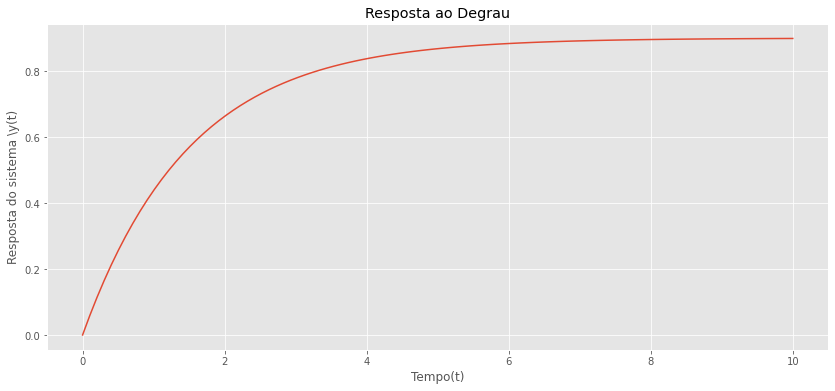

In [28]:
K = 0.9
tau = 1.5

t = np.linspace(0, 10, 100)
y_t = K*(1 - np.exp(-t/tau))

plt.figure(figsize=(14, 6))
plt.plot(t, y_t)
plt.title("Resposta ao Degrau")
plt.xlabel("Tempo(t)")
plt.ylabel("Resposta do sistema \y(t)")
plt.show()

**Domínio da Frequência Y(s)**

In [17]:
# ! pip install control

In [18]:
import control as clt

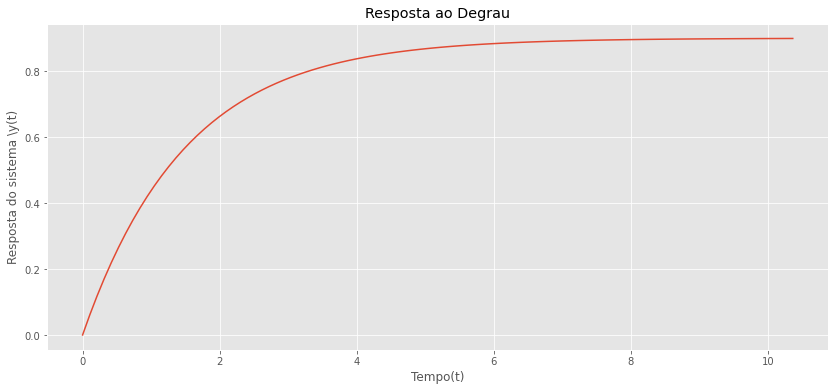

In [29]:
K = 0.9
tau = 1.5

# Função de Transferência
num = [K]
den = [tau, 1]
G_s = clt.TransferFunction(num, den)

t1, y_t1 = clt.step_response(G_s)
plt.figure(figsize=(14, 6))
plt.plot(t1, y_t1)
plt.title("Resposta ao Degrau")
plt.xlabel("Tempo(t)")
plt.ylabel("Resposta do sistema \y(t)")
plt.show()